# Introduction to Backpropagation

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Manually calculating gradients

Lets create a class for storing values, adding operations and parameters of each node

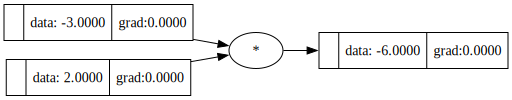

In [5]:
from value import Value, draw_dot
    
a = Value(2)
b = Value(-3.0)
d = (a*b)
draw_dot(d)

Lets analyze the expression: L = (a*b+c)*f

Lets add some labels to the nodes, in order to identify them with ease

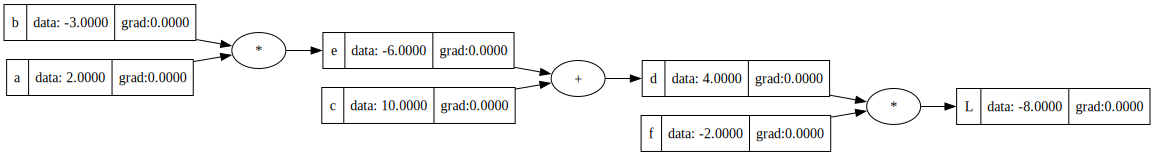

In [6]:
a = Value(2, label='a')
b = Value(-3.0, label='b')
c = Value(10, label='c')
e = a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2, label='f')
L = d*f; L.label='L'
draw_dot(L)

You can see that we have a matematical expression linking L with four free parameters: a, b, c, and f. We are now to run backpropagation, trying to increase the value of L by changing the values of the free parameters.
- For every single value we are going to calculate the derivative, using the chain rule. Using this, we will know how to change the values for increasing L 

In order to do so, we will add a property in Value to hold the derivative of L with respect to that value. We will name this property 'grad'

We start back to front, manually. We started by L

dL/dL = 1

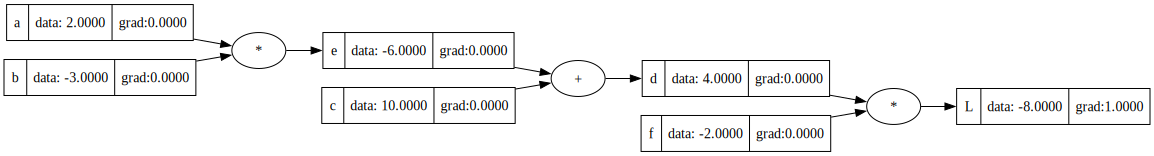

In [4]:
L.grad = 1
draw_dot(L)

 Now, lets calculate the derivatives with respect to f and d. Since L = f*d:
 
 dL/df = d
 
 dL/dd = f
 
 Lets check by hand:

In [5]:
def grad_by_hand():

    h = 0.01

    a = Value(2, label='a')
    b = Value(-3.0, label='b')
    c = Value(10, label='c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2, label='f')
    L = d*f; L.label='L'
    L1 = L.data
    
    a = Value(2, label='a')
    b = Value(-3.0, label='b')
    c = Value(10, label='c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'    
    f = Value(-2+h, label='f')  # HERE    
    L = d*f; L.label='L'   
    L2 = L.data
    
    print((L2 - L1) / h)
    
grad_by_hand()

4.0000000000000036


In [22]:
def grad_by_hand():

    h = 0.01

    a = Value(2, label='a')
    b = Value(-3.0, label='b')
    c = Value(10, label='c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2, label='f')
    L = d*f; L.label='L'
    L1 = L.data
    
    a = Value(2, label='a')
    b = Value(-3.0, label='b')
    c = Value(10, label='c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    d.data += h                 # HERE
    f = Value(-2, label='f')
    L = d*f; L.label='L'   
    L2 = L.data
    
    print((L2 - L1) / h)
    
grad_by_hand()

-1.9999999999999574


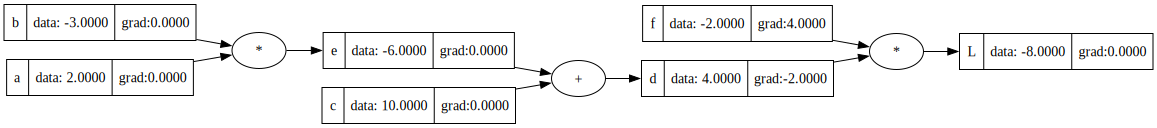

In [23]:
# Since they are correct, we will set the values
d.grad = f.data
f.grad = d.data

draw_dot(L)

Now, lets move to the previous values, e and c. We now need to calculate dL/de and dL/dc. From the chain rule we know that:

dL/de = dL/dd*dd/de
- We already calculated dL/dd, which is -2
- Since d = e+c, dd/de=1
- As a result **dL/de = -2 * 1 = -2**

In a similar waw, **dL/dc = -2**

**Note**: The + node only passes the gradient without modification

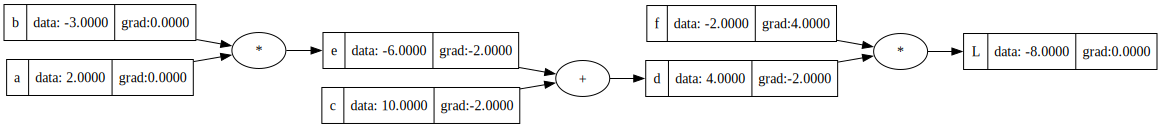

In [24]:
# After the check we know it is correct, so we update the .grad property
e.grad = -2
c.grad = -2

draw_dot(L)

Now, lets calculate the final one, the gradient for *a* and *b*, also using the chain rule.

- dL/da = dL/de * de/da
- dL/de is already known, -2
- Since e = a*b, then de/da = b

Finally, dL/da = -2 * -3 = 6

Similarly, dL/db = dL/de*de/db = -2 * a = -2 * 2 = -4

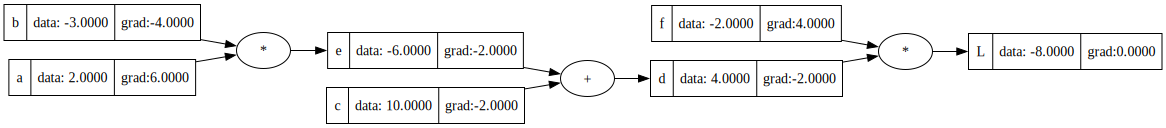

In [25]:
# Since they are correct, we updated the .grad properties.
a.grad = 6
b.grad = -4

draw_dot(L)

**Note**: There are some parameters that we can change, like a, b, c, and f, while the others are calculated, so cannot be changed.

Now, let use the gradient in order to increase the value of L

In [9]:
ag, bg, cg, fg = a.grad, b.grad, c.grad, f.grad

In [10]:
def eval_by_hand(h = 0.01):
    
    a = Value(2, label='a')
    b = Value(-3.0, label='b')
    c = Value(10, label='c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2, label='f')
    L = d*f; L.label='L'
    L1 = L.data
    
    a = Value(2 + ag * h, label='a')
    b = Value(-3.0 + bg * h, label='b')
    c = Value(10 + cg * h, label='c')
    e = a*b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2 + fg * h, label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print(L1, L2, L2-L1)
    
eval_by_hand(0.01)


-8.0 -7.800800000000001 0.19919999999999938


In [11]:
eval_by_hand(-0.01)

-8.0 -8.726303999999999 -0.726303999999999


Note, it is increased. This is the backpropagation algorithm in action! 

Lets move to something more complex, like a neuron.

A neural network has:
- Neurons
    - Weights
    - Bias (neuron default activation in absence of inputs)
    - Activation function: 
        - Introduce nonlinearities, frequently squashing the neuron output
        
There are some common activation function, like the tanh and ReLu

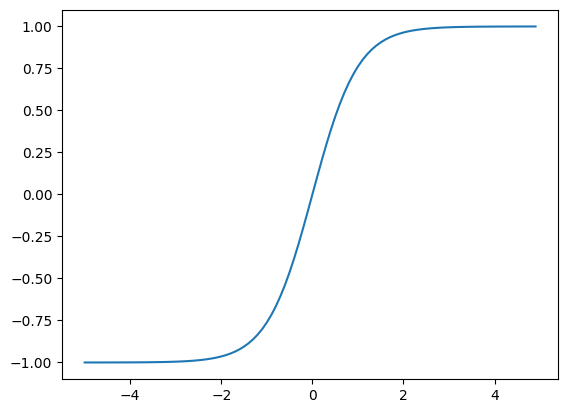

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)
plt.plot(x, np.tanh(x))
plt.show()

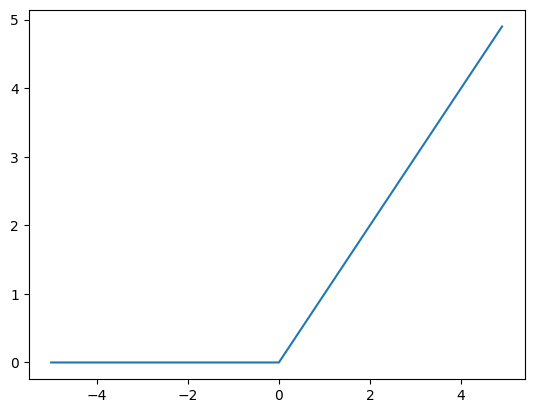

In [8]:
x = np.arange(-5, 5, 0.1)

plt.plot(x, np.where(x > 0, x, 0))
plt.show()

Lets create a system of one neuron and two inputs

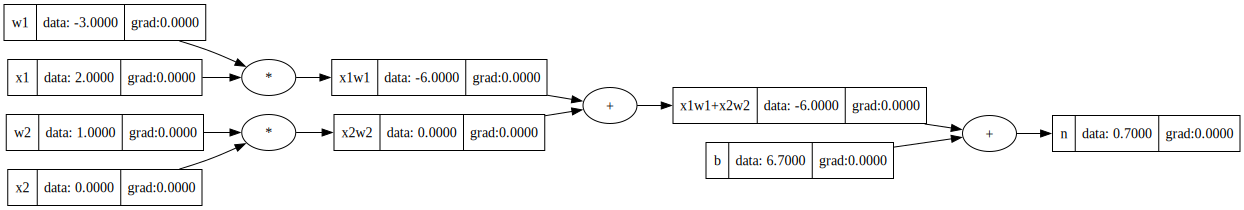

In [9]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias
b = Value(6.7, label='b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1+x2w2'
n = x1w1x2w2+b; n.label='n'

draw_dot(n)

Now evaluate the activation function

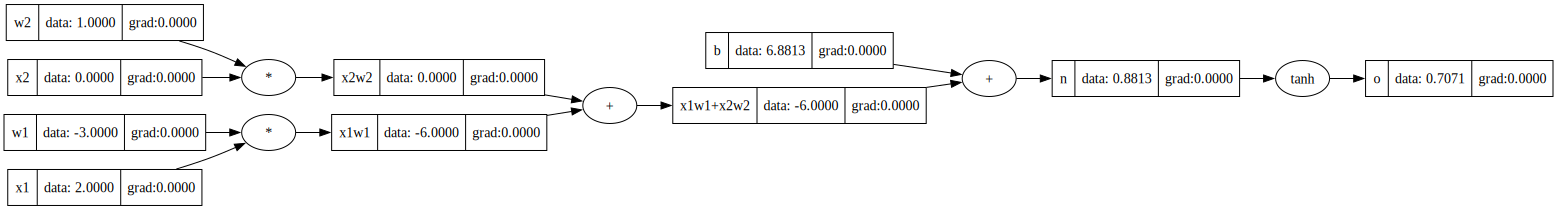

In [10]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias
b = Value(6.8812735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1+x2w2'
n = x1w1x2w2+b; n.label='n'
o = n.tanh(); o.label='o'
draw_dot(o)

Note than here the efect of tanh is minimal, but lets change the bias to 10 we would see the squashing efect of tanh. Now, lets run backpropagation on the neuron.

**Note**. While training the neuron, the only parameters that we can change are the weights and biases, because the training examples are fixed.

First, since do/do=1, lets set that in the neuron.

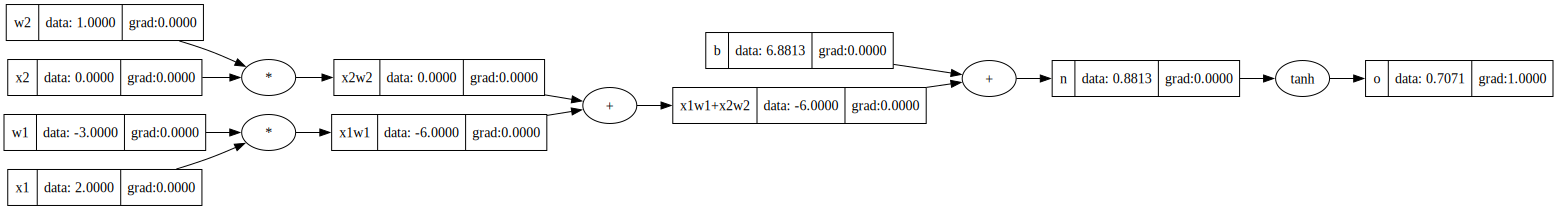

In [11]:
o.grad = 1.0
draw_dot(o)

dtanh(x)/dx = 1 - tanh(x)^2

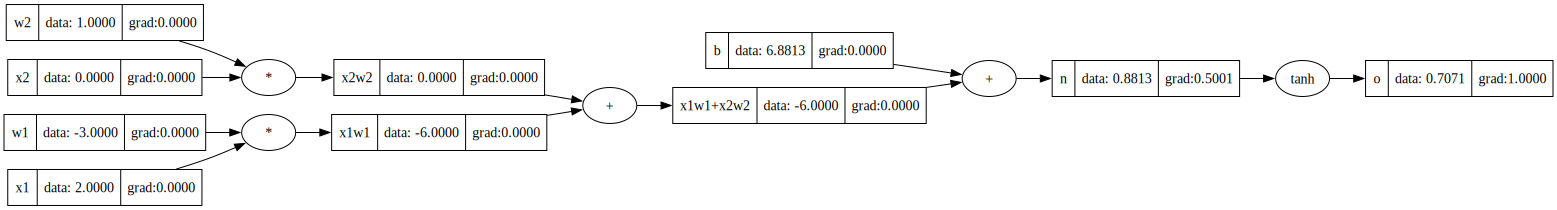

In [12]:
n.grad = 1 - (o.data)**2
draw_dot(o)

do/db = do/dn*dn/db = 0.5 * 1

do/d(x1w1+x2w2) = do/dn * dn/d(x1w1+x2w2) = 0.5 * 1 = 0.5

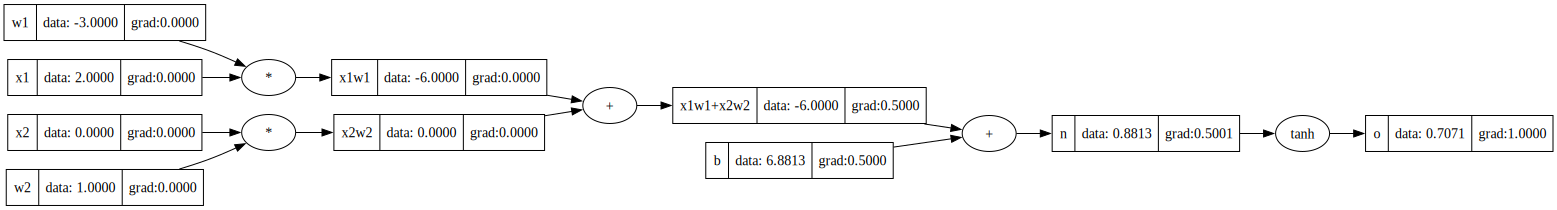

In [18]:
b.grad = 0.5
x1w1x2w2.grad = 0.5
draw_dot(o)

do/dx2w2 = do/d(x1w1+x2w2) * d(x1w1+x2w2)/dx2w2
    = 0.5 * 1 = 0.5
    
do/dx1w1 = do/d(x1w1+x2w2) * d(x1w1+x2w2)/dx1w1
    = 0.5 * 1 = 0.5

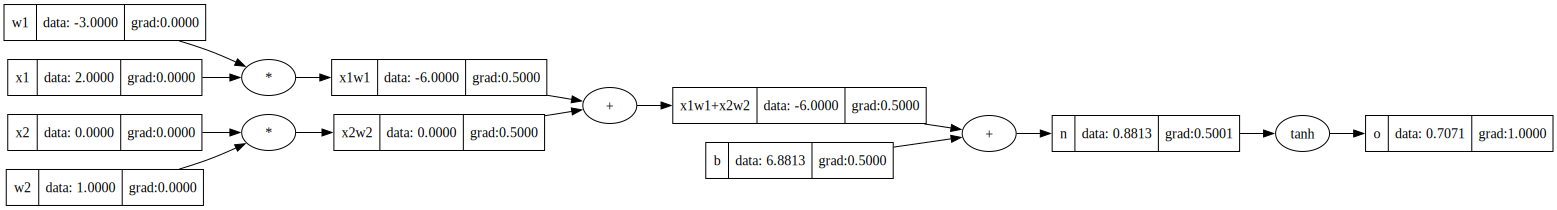

In [19]:
x2w2.grad = 0.5
x1w1.grad = 0.5
draw_dot(o)

do/dw1 = do/dx1w1 * dx1w1/dw1 = 0.5*x1 = 0.5*2 = 1

do/dx1 = do/dx1w1 * dx1w1/dx1 = 0.5*w1 = 0.5*-3 = -1.5

do/dw2 = do/dx2w2 * dx2w2/dw2 = 0.5*x2 = 0.5*0 = 0

d0/dx2 = do/dx2w2 * dx2w2/dx2 = 0.5*w2 = 0.5*1 = 0.5

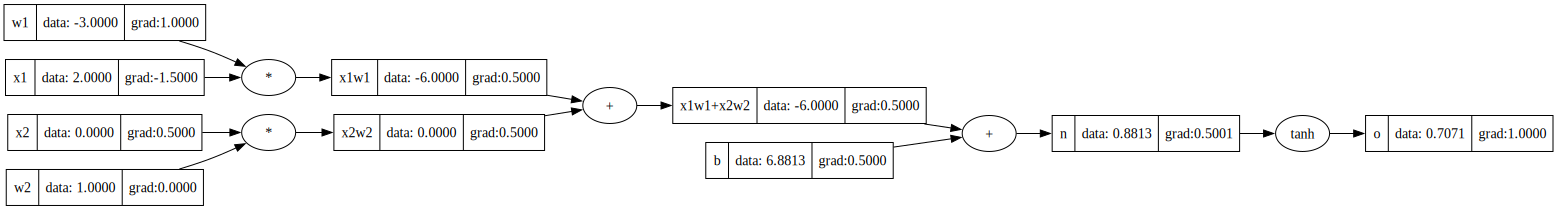

In [20]:
w1.grad = 1
x1.grad = -1.5
w2.grad = 0
x2.grad = 0.5
draw_dot(o)

Now, the parameters we can modify in order to increase the value of the function are the weights and biases.

Lets modify them to icrease the value.

In [13]:
grad_w1 = 1
grad_w2 = 0
grad_b = 0.5

def modify(h):
    x1, x2 = Value(2.0), Value(0.0)
    w1, w2 = Value(-3.0), Value(1.0)
    b = Value(6.8812735870195432)
    x1w1 = x1*w1
    x2w2 = x2*w2
    x1w1x2w2 = x1w1+x2w2
    n = x1w1x2w2+b; 
    o = n.tanh(); 
    L1 = o.data
    
    x1, x2 = Value(2.0), Value(0.0)
    w1, w2 = Value(-3.0 + h*grad_w1), Value(1.0+h*grad_w2)
    b = Value(6.8812735870195432 + h*grad_b)
    x1w1 = x1*w1
    x2w2 = x2*w2
    x1w1x2w2 = x1w1+x2w2
    n = x1w1x2w2+b; 
    o = n.tanh(); 
    L2 = o.data
    return L1, L2, L2-L1

print(modify(0.01))

(0.7070567776509304, 0.7193388831662926, 0.01228210551536213)


In [14]:
print(modify(-0.01))

(0.7070567776509304, 0.6943327452168396, -0.012724032434090815)


## AutoGrad

You can see that applying backpropagation is very simple, but tedious. Lets move to automatically calculate the gradient (autograd).

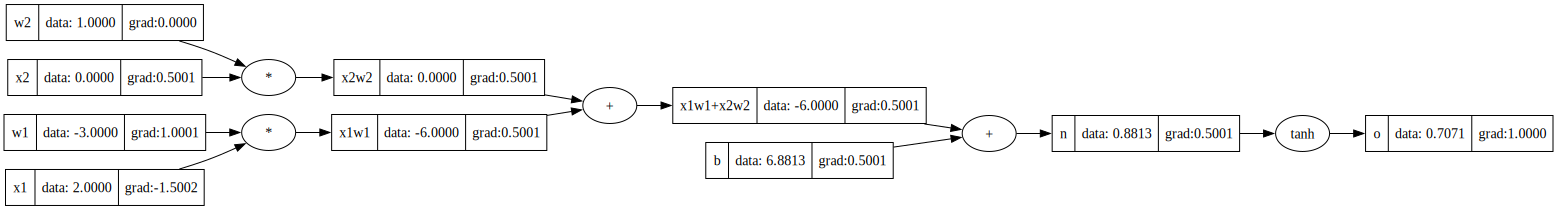

In [15]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias
b = Value(6.8812735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1+x2w2'
n = x1w1x2w2+b; n.label='n'
o = n.tanh(); o.label='o'

o.backward()
draw_dot(o)

Lets see it on a more complex example

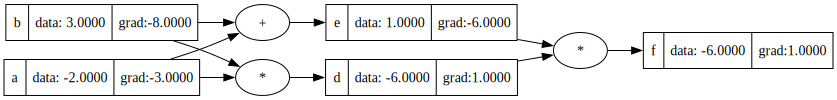

In [16]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label='d'
e = a + b; e.label='e'
f = d * e; f.label='f'

f.backward()
draw_dot(f)

You can check by hand that everything is working perfectly. Lets add a final manual check!!

In [17]:
def check():
    h = 0.001
    a = Value(-2.0, label='a')
    b = Value(3.0, label='b')
    d = a * b; d.label='d'
    e = a + b; e.label='e'
    f = d * e; f.label='f'
    L1 = f.data
    
    a = Value(-2.0+h, label='a')
    b = Value(3.0, label='b')
    d = a * b; d.label='d'
    e = a + b; e.label='e'
    f = d * e; f.label='f'
    L2 = f.data 
    
    print((L2 - L1) / h)
    
check()

-2.996999999998806


In [ ]:
def check():
    h = 0.001
    a = Value(-2.0, label='a')
    b = Value(3.0, label='b')
    d = a * b; d.label='d'
    e = a + b; e.label='e'
    f = d * e; f.label='f'
    L1 = f.data
    
    a = Value(-2.0, label='a')
    b = Value(3.0+h, label='b')
    d = a * b; d.label='d'
    e = a + b; e.label='e'
    f = d * e; f.label='f'
    L2 = f.data 
    
    print((L2 - L1) / h)
    
check()

In [17]:
import numpy as np

class Node:
    def __init__(self):
        self.value = None
        self.grad = 0.0

    def forward(self):
        raise NotImplementedError

    def backward(self, upstream_grad):
        raise NotImplementedError

class Input(Node):
    def __init__(self, value):
        super().__init__()
        self.value = value

    def forward(self):
        print(f"Input forward: value = {self.value}")
        return self.value

    def backward(self, upstream_grad):
        self.grad += upstream_grad
        print(f"Input backward: grad += {upstream_grad} → {self.grad}")

class Add(Node):
    def __init__(self, a, b):
        super().__init__()
        self.a = a
        self.b = b

    def forward(self):
        self.value = self.a.forward() + self.b.forward()
        print(f"Add forward: {self.a.value} + {self.b.value} = {self.value}")
        return self.value

    def backward(self, upstream_grad):
        print(f"Add backward: passing grad = {upstream_grad}")
        self.a.backward(upstream_grad)
        self.b.backward(upstream_grad)

class Multiply(Node):
    def __init__(self, a, b):
        super().__init__()
        self.a = a
        self.b = b

    def forward(self):
        self.a_val = self.a.forward()
        self.b_val = self.b.forward()
        self.value = self.a_val * self.b_val
        print(f"Multiply forward: {self.a_val} * {self.b_val} = {self.value}")
        return self.value

    def backward(self, upstream_grad):
        print(f"Multiply backward: upstream_grad = {upstream_grad}")
        self.a.backward(upstream_grad * self.b_val)
        self.b.backward(upstream_grad * self.a_val)

class Square(Node):
    def __init__(self, x):
        super().__init__()
        self.x = x

    def forward(self):
        self.x_val = self.x.forward()
        self.value = self.x_val ** 2
        print(f"Square forward: {self.x_val}^2 = {self.value}")
        return self.value

    def backward(self, upstream_grad):
        print(f"Square backward: upstream_grad = {upstream_grad}")
        self.x.backward(upstream_grad * 2 * self.x_val)

class Cos(Node):
    def __init__(self, x):
        super().__init__()
        self.x = x

    def forward(self):
        self.x_val = self.x.forward()
        self.value = np.cos(self.x_val)
        print(f"Cos forward: cos({self.x_val}) = {self.value}")
        return self.value

    def backward(self, upstream_grad):
        print(f"Cos backward: upstream_grad = {upstream_grad}")
        self.x.backward(-upstream_grad * np.sin(self.x_val))

class Exp(Node):
    def __init__(self, x):
        super().__init__()
        self.x = x

    def forward(self):
        self.x_val = self.x.forward()
        self.value = np.exp(self.x_val)
        print(f"Exp forward: exp({self.x_val}) = {self.value}")
        return self.value

    def backward(self, upstream_grad):
        print(f"Exp backward: upstream_grad = {upstream_grad}")
        self.x.backward(upstream_grad * np.exp(self.x_val))

# Build the graph Z = H + exp(W + D)
a = Input(2.0)
b = Input(3.0)

H = Add(a, b)               # H = a + b
W = Cos(Square(a))          # W = cos(a^2)
D = Multiply(a, b)          # D = a * b
Z = Add(H, Exp(Add(W, D)))  # Z = H + exp(W + D)

# Forward pass
print("\n===== FORWARD PASS =====")
output = Z.forward()
print(f"\nFinal output Z = {output}\n")

# Backward pass
print("===== BACKWARD PASS =====")
Z.backward(1.0)

print("\nFinal gradients:")
print(f"dZ/da = {a.grad}")
print(f"dZ/db = {b.grad}")



===== FORWARD PASS =====
Input forward: value = 2.0
Input forward: value = 3.0
Add forward: 2.0 + 3.0 = 5.0
Input forward: value = 2.0
Square forward: 2.0^2 = 4.0
Cos forward: cos(4.0) = -0.6536436208636119
Input forward: value = 2.0
Input forward: value = 3.0
Multiply forward: 2.0 * 3.0 = 6.0
Add forward: -0.6536436208636119 + 6.0 = 5.346356379136388
Exp forward: exp(5.346356379136388) = 209.8423173971554
Add forward: 5.0 + 209.8423173971554 = 214.8423173971554

Final output Z = 214.8423173971554

===== BACKWARD PASS =====
Add backward: passing grad = 1.0
Add backward: passing grad = 1.0
Input backward: grad += 1.0 → 1.0
Input backward: grad += 1.0 → 1.0
Exp backward: upstream_grad = 1.0
Add backward: passing grad = 209.8423173971554
Cos backward: upstream_grad = 209.8423173971554
Square backward: upstream_grad = 158.80918942736548
Input backward: grad += 635.2367577094619 → 636.2367577094619
Multiply backward: upstream_grad = 209.8423173971554
Input backward: grad += 629.52695219146